# Calorie_Calculation_of_Food_Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df=pd.read_csv("Nutritions_US.csv",encoding = 'ISO-8859-1')

In [3]:
df.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(¾g),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(¾g),Folic_Acid_(¾g),Food_Folate_(¾g),Folate_DFE_(¾g),Choline_Tot_ (mg),Vit_B12_(¾g),Vit_A_IU,Vit_A_RAE,Retinol_(¾g),Alpha_Carot_(¾g),Beta_Carot_(¾g),Beta_Crypt_(¾g),Lycopene_(¾g),Lut+Zea_ (¾g),Vit_E_(mg),Vit_D_¾g,Vit_D_IU,Vit_K_(¾g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,2.0,24.0,24.0,643.0,0.09,0.000,0.000,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3.0,0.0,3.0,3.0,18.8,0.17,2499.0,684.0,671.0,0.0,158.0,0.0,0.0,0.0,2.32,0.0,0.0,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,0.05,1.0,24.0,41.0,583.0,0.05,0.010,0.001,0.0,0.0,0.007,0.064,0.022,0.097,0.008,4.0,0.0,4.0,4.0,18.8,0.07,2468.0,683.0,671.0,1.0,135.0,6.0,0.0,13.0,1.37,0.0,0.0,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,0.0,3.0,5.0,2.0,0.01,0.001,0.000,0.0,0.0,0.001,0.005,0.003,0.010,0.001,0.0,0.0,0.0,0.0,22.3,0.01,3069.0,840.0,824.0,0.0,193.0,0.0,0.0,0.0,2.80,0.0,0.0,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,0.31,23.0,387.0,256.0,1146.0,2.66,0.040,0.009,14.5,0.0,0.029,0.382,1.016,1.729,0.166,36.0,0.0,36.0,36.0,15.4,1.22,721.0,198.0,192.0,0.0,74.0,0.0,0.0,0.0,0.25,0.5,21.0,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,0.43,24.0,451.0,136.0,560.0,2.60,0.024,0.012,14.5,0.0,0.014,0.351,0.118,0.288,0.065,20.0,0.0,20.0,20.0,15.4,1.26,1080.0,292.0,286.0,0.0,76.0,0.0,0.0,0.0,0.26,0.5,22.0,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NDB_No             8790 non-null   int64  
 1   Shrt_Desc          8790 non-null   object 
 2   Water_(g)          8789 non-null   float64
 3   Energ_Kcal         8790 non-null   int64  
 4   Protein_(g)        8790 non-null   float64
 5   Lipid_Tot_(g)      8790 non-null   float64
 6   Ash_(g)            8465 non-null   float64
 7   Carbohydrt_(g)     8790 non-null   float64
 8   Fiber_TD_(g)       8196 non-null   float64
 9   Sugar_Tot_(g)      6958 non-null   float64
 10  Calcium_(mg)       8442 non-null   float64
 11  Iron_(mg)          8646 non-null   float64
 12  Magnesium_(mg)     8051 non-null   float64
 13  Phosphorus_(mg)    8211 non-null   float64
 14  Potassium_(mg)     8364 non-null   float64
 15  Sodium_(mg)        8707 non-null   float64
 16  Zinc_(mg)          8084 

In [5]:
df["Shrt_Desc"]=df["Shrt_Desc"].str.lower().str.replace(","," ")

In [6]:
for column in df.select_dtypes(include=np.number):
    df[column].fillna(0,inplace=True)

In [7]:
df["GmWt_Desc1"].fillna("None",inplace=True)
df["GmWt_Desc2"].fillna("None",inplace=True)

In [8]:
df.isnull().sum()

NDB_No               0
Shrt_Desc            0
Water_(g)            0
Energ_Kcal           0
Protein_(g)          0
Lipid_Tot_(g)        0
Ash_(g)              0
Carbohydrt_(g)       0
Fiber_TD_(g)         0
Sugar_Tot_(g)        0
Calcium_(mg)         0
Iron_(mg)            0
Magnesium_(mg)       0
Phosphorus_(mg)      0
Potassium_(mg)       0
Sodium_(mg)          0
Zinc_(mg)            0
Copper_mg)           0
Manganese_(mg)       0
Selenium_(¾g)        0
Vit_C_(mg)           0
Thiamin_(mg)         0
Riboflavin_(mg)      0
Niacin_(mg)          0
Panto_Acid_mg)       0
Vit_B6_(mg)          0
Folate_Tot_(¾g)      0
Folic_Acid_(¾g)      0
Food_Folate_(¾g)     0
Folate_DFE_(¾g)      0
Choline_Tot_ (mg)    0
Vit_B12_(¾g)         0
Vit_A_IU             0
Vit_A_RAE            0
Retinol_(¾g)         0
Alpha_Carot_(¾g)     0
Beta_Carot_(¾g)      0
Beta_Crypt_(¾g)      0
Lycopene_(¾g)        0
Lut+Zea_ (¾g)        0
Vit_E_(mg)           0
Vit_D_¾g             0
Vit_D_IU             0
Vit_K_(¾g) 

# Modeling

In [9]:
df.drop("NDB_No",axis=1,inplace=True)

In [10]:
df.corr()

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(¾g),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(¾g),Folic_Acid_(¾g),Food_Folate_(¾g),Folate_DFE_(¾g),Choline_Tot_ (mg),Vit_B12_(¾g),Vit_A_IU,Vit_A_RAE,Retinol_(¾g),Alpha_Carot_(¾g),Beta_Carot_(¾g),Beta_Crypt_(¾g),Lycopene_(¾g),Lut+Zea_ (¾g),Vit_E_(mg),Vit_D_¾g,Vit_D_IU,Vit_K_(¾g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2
Water_(g),1.000000,-0.900535,-0.103833,-0.489584,-0.235744,-0.774010,-0.385601,-0.457883,-0.237414,-0.349057,-0.391178,-0.290640,-0.200500,-0.157078,-0.149319,-0.140070,-0.067401,-0.049426,-0.013933,-0.289896,-0.264575,-0.275259,-0.092365,-0.228376,-0.326657,-0.246593,-0.123062,-0.266633,-0.014874,0.013203,0.011636,-0.023366,-0.027807,0.042812,0.065948,0.003168,0.038339,0.072780,-0.231762,-0.057984,-0.057947,0.020771,-0.367960,-0.390598,-0.399317,0.055348,0.396132,0.147064
Energ_Kcal,-0.900535,1.000000,0.112636,0.806677,0.083260,0.493028,0.202065,0.315796,0.124892,0.196225,0.262945,0.200714,0.081643,0.055920,0.114401,0.102508,0.037305,0.057584,-0.032983,0.186639,0.154218,0.174282,0.061826,0.119251,0.184394,0.139003,0.051113,0.143986,0.038677,-0.013957,-0.029806,0.025552,0.035004,-0.053661,-0.086297,-0.021632,-0.051792,-0.088871,0.303858,0.074981,0.074914,-0.024115,0.619119,0.676569,0.595191,0.015090,-0.389617,-0.088113
Protein_(g),-0.103833,0.112636,1.000000,0.062336,0.106315,-0.304295,-0.074143,-0.269321,0.046245,0.128590,0.217982,0.444553,0.248371,-0.003170,0.422067,0.153353,0.034820,0.383919,-0.064406,0.102427,0.213512,0.394060,0.238167,0.244223,0.008987,-0.030489,0.117105,0.008249,0.407901,0.250290,-0.021469,0.028668,0.043655,-0.057550,-0.090050,-0.029629,-0.054799,-0.081523,-0.028482,0.018185,0.018243,-0.071973,0.052530,0.094276,-0.039389,0.290245,-0.149047,0.193043
Lipid_Tot_(g),-0.489584,0.806677,0.062336,1.000000,-0.005906,-0.048594,-0.023089,-0.000276,0.016833,-0.035627,0.082351,0.074428,-0.036830,0.011052,0.032113,0.047716,0.001097,0.038995,-0.057367,-0.001632,-0.031554,-0.018254,0.008609,-0.041972,-0.049436,-0.047979,-0.029437,-0.054963,0.048824,-0.020914,-0.020569,0.025133,0.033737,-0.041223,-0.057795,-0.015263,-0.040837,-0.061643,0.337699,0.073140,0.073059,0.015055,0.764603,0.868514,0.703962,0.087229,-0.256681,0.003930
Ash_(g),-0.235744,0.083260,0.106315,-0.005906,1.000000,0.119708,0.179003,0.006669,0.474304,0.197636,0.258841,0.414972,0.350531,0.813908,0.081697,0.091861,0.060103,0.054288,0.043199,0.130019,0.148580,0.122815,0.089984,0.115333,0.117955,0.082138,0.119940,0.114039,0.069066,0.017736,0.050887,0.016709,0.012831,0.010740,0.033048,0.028483,0.037471,0.010531,0.054890,0.022577,0.022641,0.062480,-0.023510,-0.001901,0.016658,-0.006389,-0.130826,-0.049805
Carbohydrt_(g),-0.774010,0.493028,-0.304295,-0.048594,0.119708,1.000000,0.455710,0.617259,0.189064,0.344312,0.283977,0.073324,0.117867,0.075554,-0.015402,0.063149,0.055516,-0.115557,0.069566,0.274447,0.220383,0.160663,0.001544,0.179870,0.380982,0.309885,0.099611,0.318637,-0.170225,-0.098181,0.002253,-0.000719,-0.005796,-0.002952,-0.008999,0.013916,-0.001989,-0.015369,0.072081,0.014612,0.014592,-0.011403,-0.043835,-0.096127,0.054849,-0.219735,-0.220803,-0.232494
Fiber_TD_(g),-0.385601,0.202065,-0.074143,-0.023089,0.179003,0.455710,1.000000,0.107561,0.233700,0.380423,0.540110,0.159339,0.326529,0.010007,0.082783,0.185536,0.102737,-0.034297,0.068086,0.203500,0.152224,0.128682,0.067163,0.235151,0.306013,0.156927,0.320527,0.242977,-0.067279,-0.054569,0.107086,0.005424,-0.019747,0.064488,0.143116,0.120142,0.024727,0.096958,0.153374,-0.011303,-0.011272,0.155161,-0.075663,-0.030789,0.073603,-0.145824,-0.076920,-0.148700
Sugar_Tot_(g),-0.457883,0.315796,-0.269321,-0.000276,0.006669,0.617259,0.107561,1.000000,0.125703,0.113846,0.041107,-0.053286,-0.005767,0.005118,-0

<Axes: >

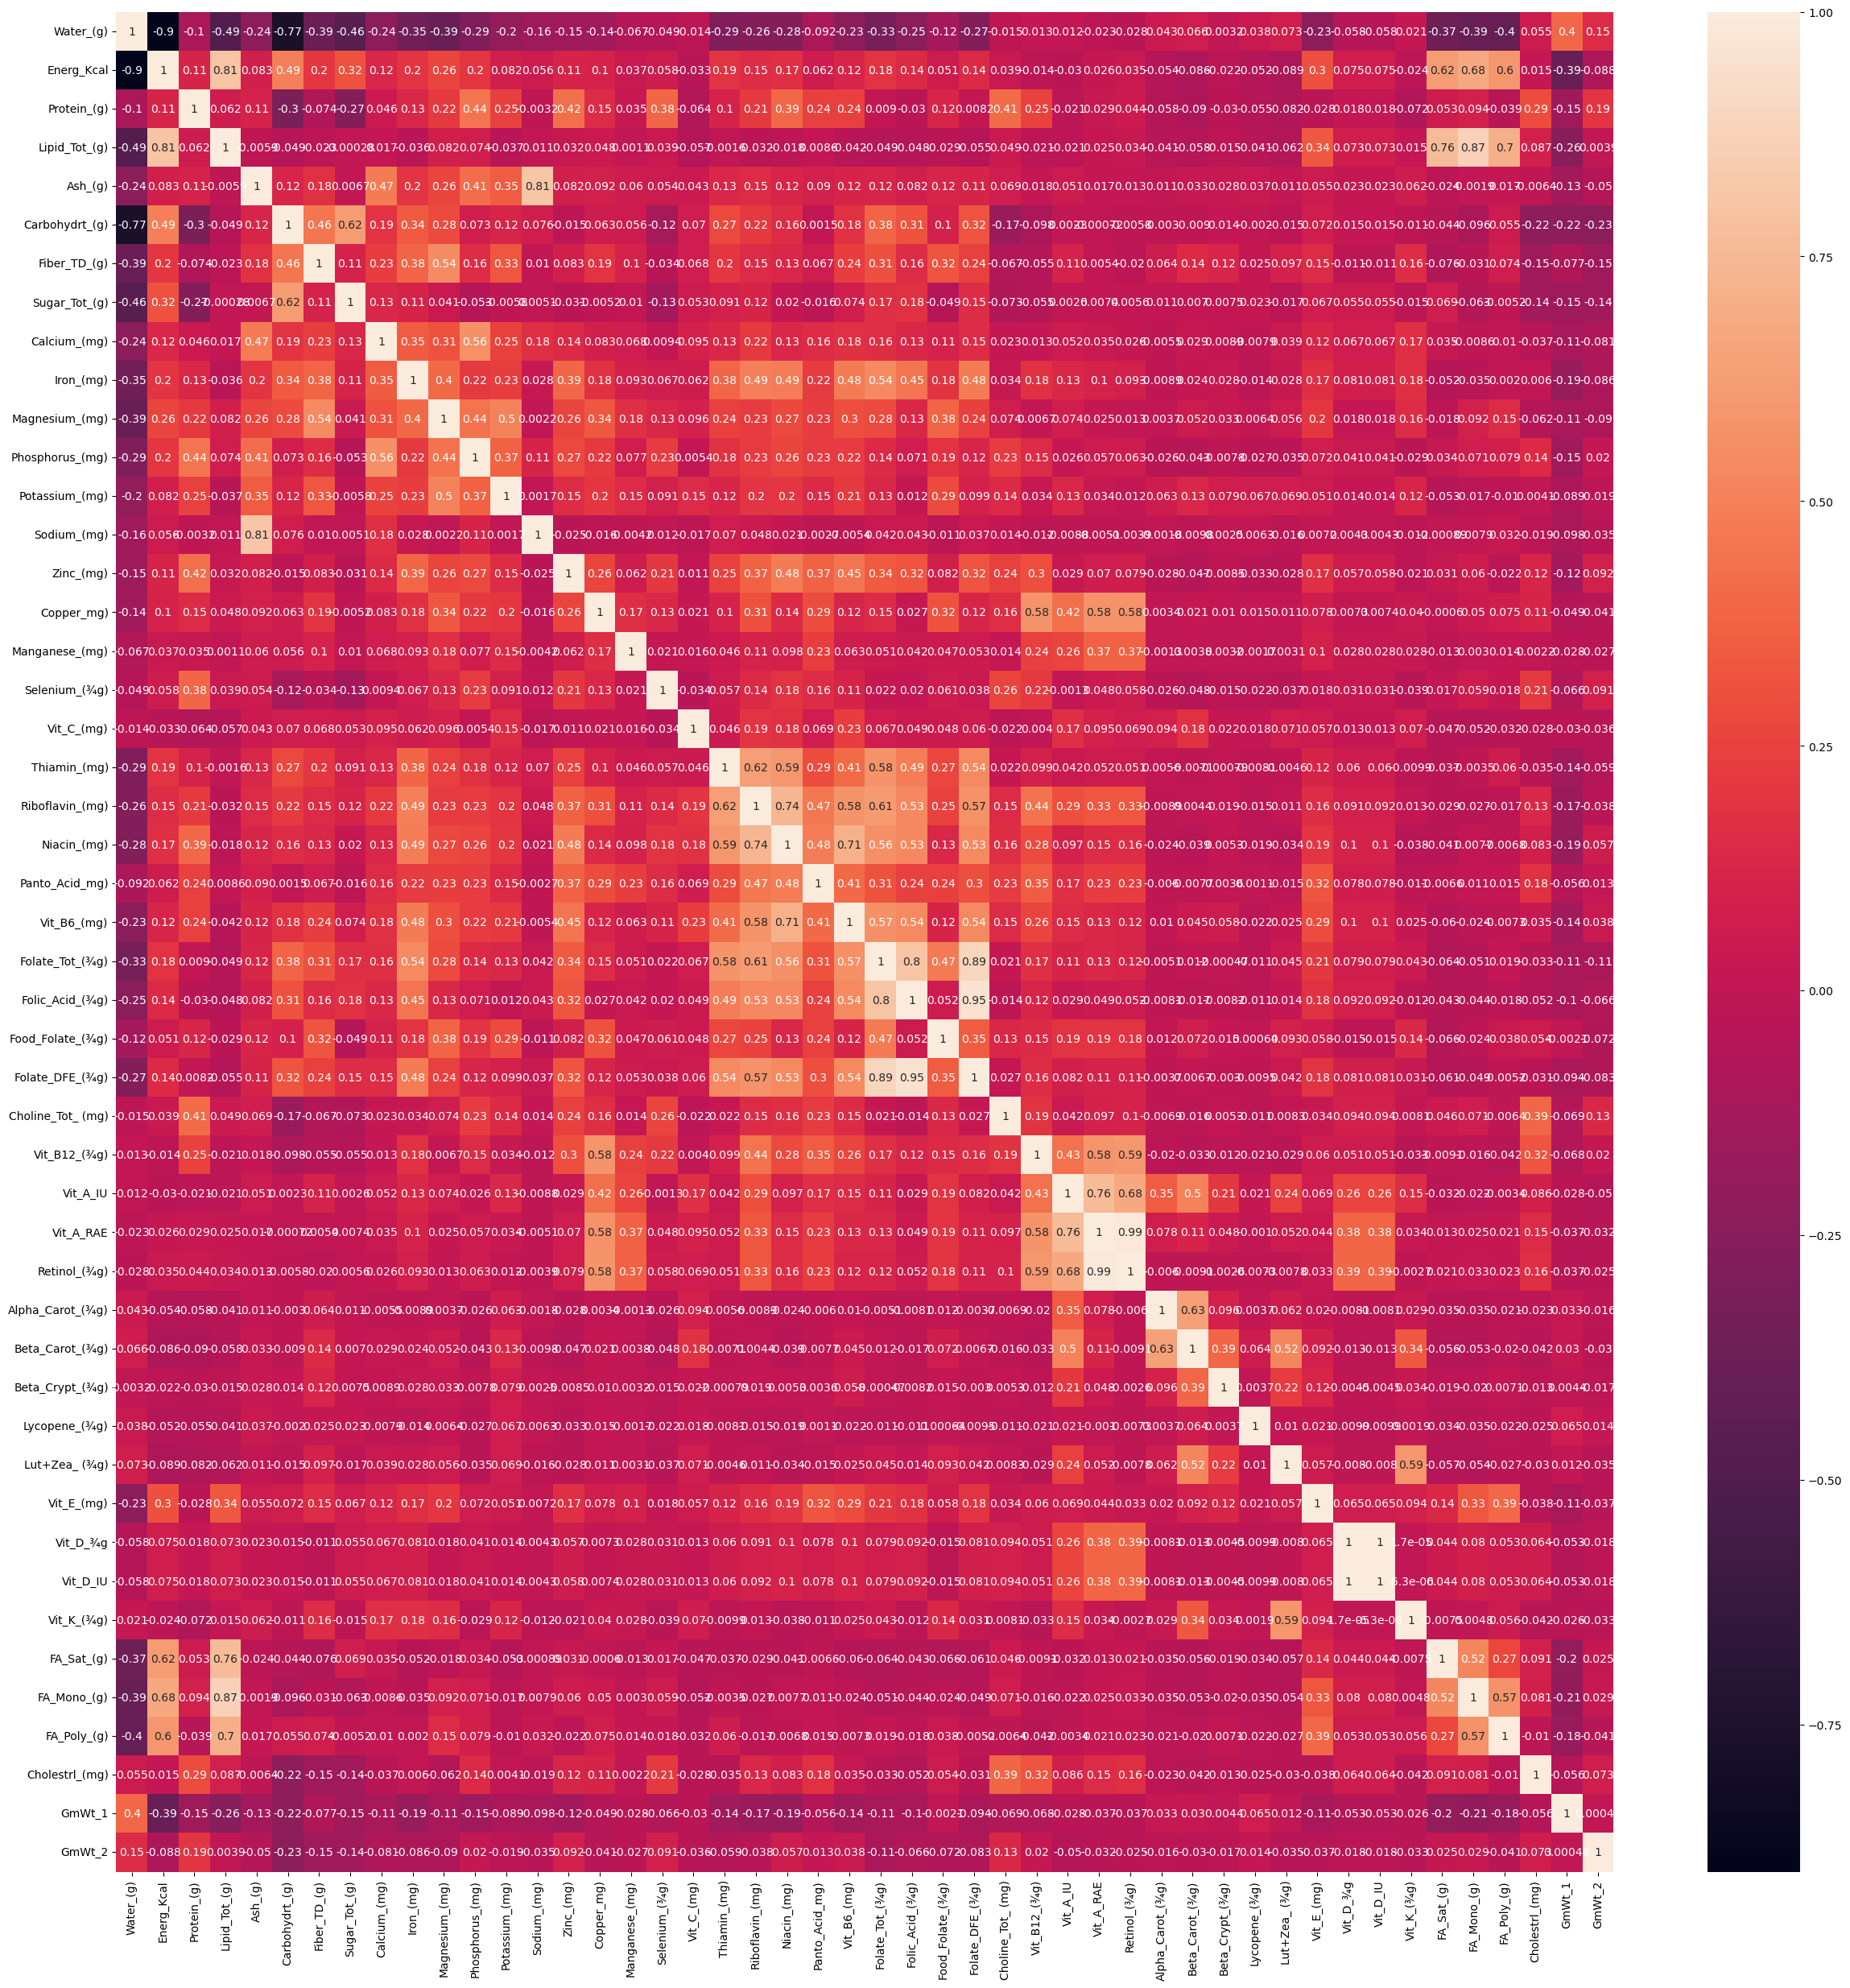

In [11]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [12]:
abs(df.corr()["Energ_Kcal"].sort_values(ascending=False))

Energ_Kcal           1.000000
Lipid_Tot_(g)        0.806677
FA_Mono_(g)          0.676569
FA_Sat_(g)           0.619119
FA_Poly_(g)          0.595191
Carbohydrt_(g)       0.493028
Sugar_Tot_(g)        0.315796
Vit_E_(mg)           0.303858
Magnesium_(mg)       0.262945
Fiber_TD_(g)         0.202065
Phosphorus_(mg)      0.200714
Iron_(mg)            0.196225
Thiamin_(mg)         0.186639
Folate_Tot_(¾g)      0.184394
Niacin_(mg)          0.174282
Riboflavin_(mg)      0.154218
Folate_DFE_(¾g)      0.143986
Folic_Acid_(¾g)      0.139003
Calcium_(mg)         0.124892
Vit_B6_(mg)          0.119251
Zinc_(mg)            0.114401
Protein_(g)          0.112636
Copper_mg)           0.102508
Ash_(g)              0.083260
Potassium_(mg)       0.081643
Vit_D_¾g             0.074981
Vit_D_IU             0.074914
Panto_Acid_mg)       0.061826
Selenium_(¾g)        0.057584
Sodium_(mg)          0.055920
Food_Folate_(¾g)     0.051113
Choline_Tot_ (mg)    0.038677
Manganese_(mg)       0.037305
Retinol_(¾

In [13]:
df_reg=df
df_reg=pd.get_dummies(df_reg,drop_first=True)
df_reg.shape

(8790, 10666)

In [14]:
x,y=df_reg.drop("Energ_Kcal",axis=1),df_reg[["Energ_Kcal"]]

In [15]:
x.shape,y.shape

((8790, 10665), (8790, 1))

In [17]:
def fnc_regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [18]:
fnc_regression_funct(x,y)

,R_Squared,RMSE,MAE
Ridge,0.992757,14.701582,5.692980
LinearRegression,0.992743,14.716363,5.684466
Lasso,0.992009,15.442477,6.172823
ElasticNet,0.991996,15.455286,6.213567
GradientBoostingRegressor,0.991358,16.059439,7.668449
ExtraTreeRegressor,0.983303,22.322400,9.808305
KNeighborsRegressor,0.794076,78.391857,46.574289


# Deep Learning

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [20]:
x=scaler.fit_transform(x)

In [21]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,10615,10616,10617,10618,10619,10620,10621,10622,10623,10624,10625,10626,10627,10628,10629,10630,10631,10632,10633,10634,10635,10636,10637,10638,10639,10640,10641,10642,10643,10644,10645,10646,10647,10648,10649,10650,10651,10652,10653,10654,10655,10656,10657,10658,10659,10660,10661,10662,10663,10664
0,0.1587,0.009624,0.8111,0.021142,0.0006,0.0,0.000601,0.003259,0.000162,0.002561,0.002420,0.001455,0.016590,0.000990,0.000000,0.000000,0.000522,0.0,0.000214,0.001943,0.000329,0.003188,0.000250,0.000792,0.0,0.001282,0.000510,0.007823,0.001719,0.02499,0.022800,0.022367,0.00000,0.003684,0.00000,0.0,0.00000,0.015529,0.000,0.0000,0.004083,0.537322,0.251180,0.040778,0.069355,0.004223,0.002484,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1672,0.005548,0.7830,0.016232,0.0287,0.0,0.000601,0.003123,0.000405,0.001280,0.002420,0.002485,0.015042,0.000550,0.000664,0.000003,0.000000,0.0,0.000299,0.003657,0.000173,0.002812,0.000667,0.001057,0.0,0.001709,0.000680,0.007823,0.000708,0.02468,0.022767,0.022367,0.00007,0.003148,0.00096,0.0,0.00066,0.009170,0.000,0.0000,0.002683,0.474791,0.237474,0.044638,0.072581,0.003209,0.001644,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0024,0.003170,0.9948,0.000000,0.0000,0.0,0.000000,0.000543,0.000000,0.000000,0.000302,0.000303,0.000052,0.000110,0.000066,0.000000,0.000000,0.0,0.000043,0.000286,0.000024,0.000290,0.000083,0.000000,0.0,0.000000,0.000000,0.009279,0.000101,0.03069,0.028000,0.027467,0.00000,0.004500,0.00000,0.0,0.00000,0.018742,0.000,0.0000,0.005016,0.647741,0.343319,0.049502,0.082581,0.010811,0.035858,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4241,0.242301,0.2874,0.051202,0.0234,0.0,0.005010,0.071700,0.002508,0.029449,0.039020,0.015515,0.029568,0.029247,0.002658,0.000027,0.007564,0.0,0.001241,0.021829,0.007969,0.050116,0.013833,0.009509,0.0,0.015385,0.006121,0.006408,0.012337,0.00721,0.006600,0.006400,0.00000,0.001725,0.00000,0.0,0.00000,0.001673,0.002,0.0021,0.001400,0.195282,0.092939,0.010721,0.024194,0.023944,0.002974,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.4111,0.263134,0.2968,0.031864,0.0279,0.0,0.005110,0.091526,0.003479,0.030730,0.045473,0.008242,0.014449,0.028587,0.001595,0.000037,0.007564,0.0,0.000599,0.020057,0.000925,0.008348,0.005417,0.005283,0.0,0.008547,0.003401,0.006408,0.012741,0.01080,0.009733,0.009533,0.00000,0.001772,0.00000,0.0,0.00000,0.001740,0.002,0.0022,0.001458,0.196276,0.102738,0.010506,0.030323,0.111486,0.019766,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
x.shape,y.shape

((8790, 10665), (8790, 1))

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [24]:
model=Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')#mse regression

In [25]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=100, verbose=1)

Epoch 1/100
55/55 [==============================] - 10s 131ms/step - loss: 20359.2500 - val_loss: 1517.9006
Epoch 2/100
55/55 [==============================] - 7s 123ms/step - loss: 1616.9548 - val_loss: 1509.6718
Epoch 3/100
55/55 [==============================] - 7s 124ms/step - loss: 726.4221 - val_loss: 1031.6073
Epoch 4/100
55/55 [==============================] - 7s 124ms/step - loss: 289.8069 - val_loss: 1059.0485
Epoch 5/100
55/55 [==============================] - 7s 124ms/step - loss: 181.5592 - val_loss: 1136.6942
Epoch 6/100
55/55 [==============================] - 7s 124ms/step - loss: 123.0219 - val_loss: 1050.4624
Epoch 7/100
55/55 [==============================] - 7s 124ms/step - loss: 102.1420 - val_loss: 990.5427
Epoch 8/100
55/55 [==============================] - 7s 124ms/step - loss: 102.9648 - val_loss: 1101.2131
Epoch 9/100
55/55 [==============================] - 7s 124ms/step - loss: 122.7331 - val_loss: 1053.3032
Epoch 10/100
55/55 [=======================

55/55 [==============================] - 7s 126ms/step - loss: 60.3626 - val_loss: 1210.7150
Epoch 79/100
55/55 [==============================] - 7s 125ms/step - loss: 46.5275 - val_loss: 1139.1251
Epoch 80/100
55/55 [==============================] - 7s 125ms/step - loss: 30.0392 - val_loss: 1025.8942
Epoch 81/100
55/55 [==============================] - 7s 124ms/step - loss: 13.3326 - val_loss: 1098.5486
Epoch 82/100
55/55 [==============================] - 7s 125ms/step - loss: 8.8251 - val_loss: 1084.8428
Epoch 83/100
55/55 [==============================] - 7s 125ms/step - loss: 9.6816 - val_loss: 1074.5468
Epoch 84/100
55/55 [==============================] - 7s 125ms/step - loss: 11.4546 - val_loss: 1071.2988
Epoch 85/100
55/55 [==============================] - 7s 125ms/step - loss: 18.8810 - val_loss: 1034.8636
Epoch 86/100
55/55 [==============================] - 7s 125ms/step - loss: 54.7423 - val_loss: 1085.5759
Epoch 87/100
55/55 [==============================] - 7s 125m

In [26]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5460992   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               2

<Axes: >

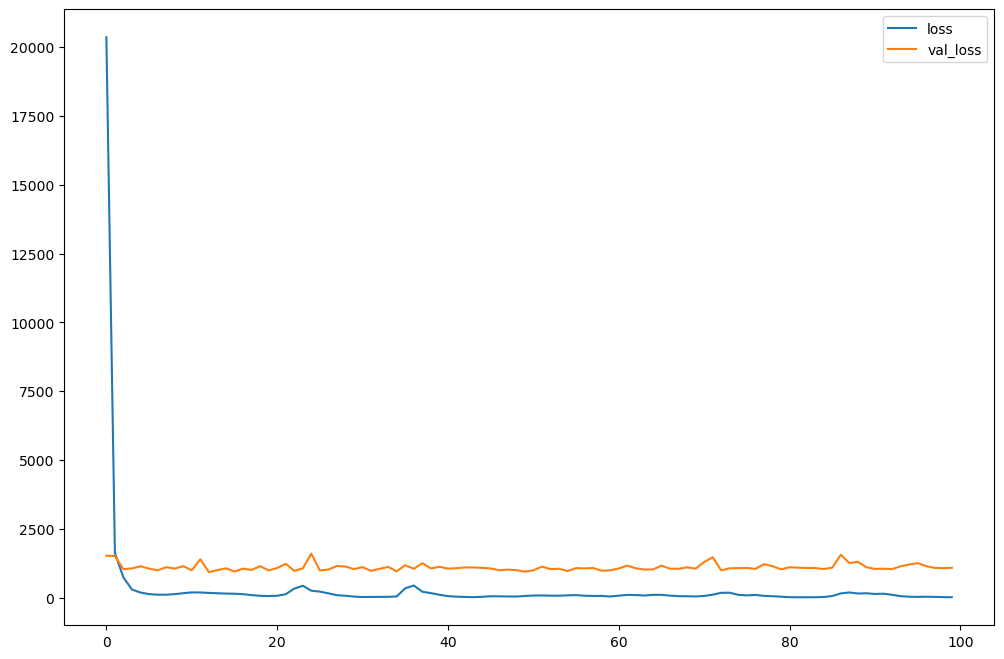

In [27]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [28]:
pred=model.predict(x_test)

55/55 [==============================] - 1s 16ms/step


In [29]:
(mean_squared_error(y_test,pred))**.5

32.85087840015011

In [30]:
r2_score(y_test,pred)

0.9638374795144653

# Clustering

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [32]:
df_clust=df

In [33]:
x=pd.get_dummies(df_clust,drop_first=True)

In [34]:
allscore=[]
allclusters=[]
sum_of_squared_distances = []
preds=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model-model fit(x) 
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x,pred)
        print ("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
        preds.append(pred)

In [35]:
clust(10)

Number of cluster 2, silhouette 0.9674984559918266
Number of cluster 3, silhouette 0.8997942431520038
Number of cluster 4, silhouette 0.8754951611181767
Number of cluster 5, silhouette 0.8774761374639636
Number of cluster 6, silhouette 0.876261065100947
Number of cluster 7, silhouette 0.8769364904870466
Number of cluster 8, silhouette 0.7800207627220587
Number of cluster 9, silhouette 0.681931071874103
Number of cluster 10, silhouette 0.733729760915017


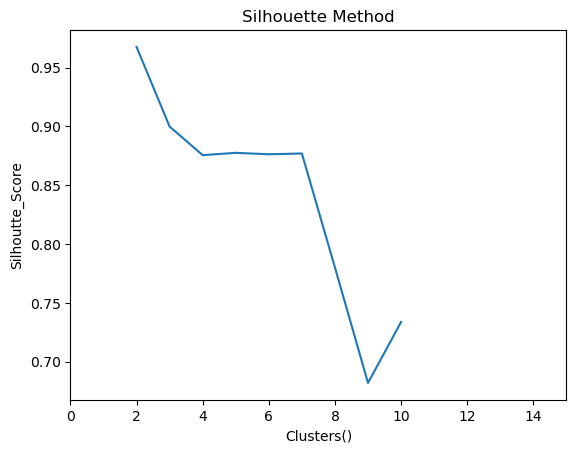

In [36]:
plt.plot(allclusters,allscore)
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

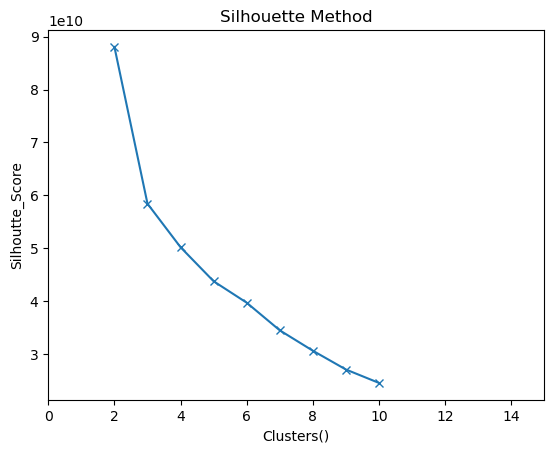

In [37]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


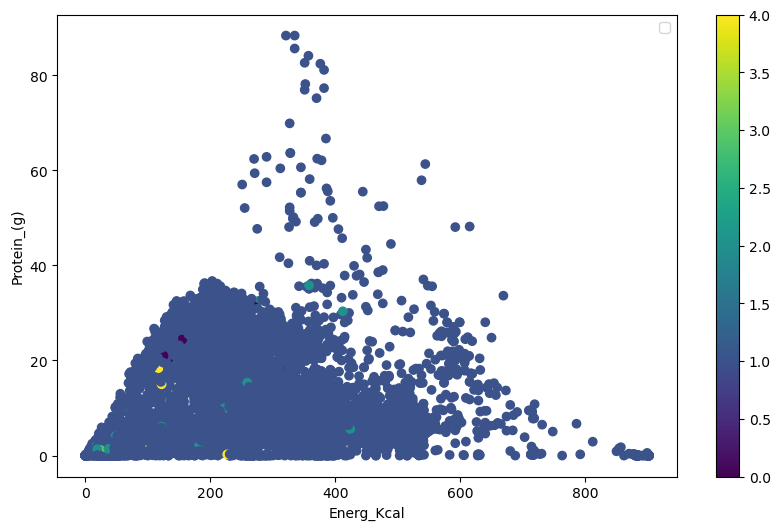

In [38]:
#If clustering is done for 4
plt.figure(figsize=(10,6))
plt.scatter(x["Energ_Kcal"],x["Protein_(g)"],c=preds[3])
plt.xlabel("Energ_Kcal")
plt.ylabel("Protein_(g)")
plt.legend()
plt.colorbar()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


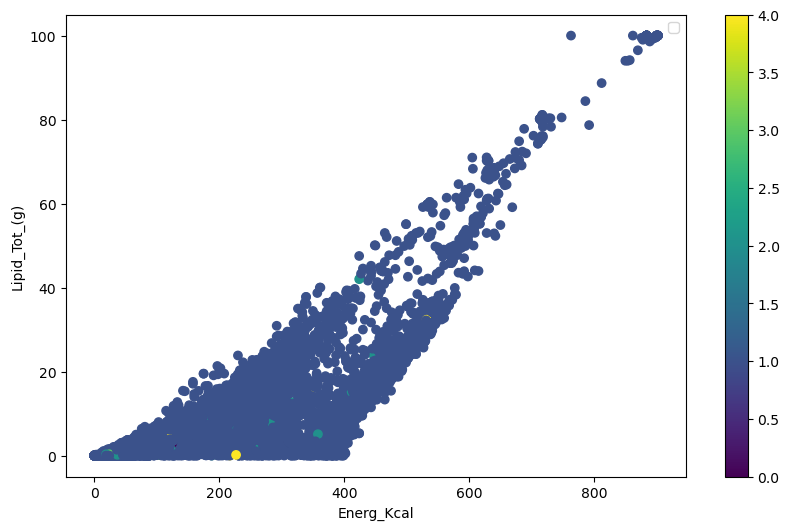

In [39]:
#If clustering is done for 4
plt.figure(figsize=(10,6))
plt.scatter(x["Energ_Kcal"],x["Lipid_Tot_(g)"],c=preds[3])
plt.xlabel("Energ_Kcal")
plt.ylabel("Lipid_Tot_(g)")
plt.legend()
plt.colorbar()
plt.show()

In [40]:
df_clust["cluster"]=preds[3]

In [41]:
df_clust[["Shrt_Desc","Energ_Kcal","cluster"]].sample(20).sort_index()

,Shrt_Desc,Energ_Kcal,cluster
320,babyfood meat ham str,97,1
342,babyfood ravioli chs filled w/tomato sau,99,1
527,inf formu mead johns enfa lipil w/ iro liq con...,131,1
588,inf formula mead johns enfami ar lipil rtf...,68,1
1269,soup crm of veg dry pdr,446,2
1501,campbell's red & white - microwaveable bowls v...,34,1
1776,cereals rte kellogg kellogg's appl jacks,375,1
3794,beef var meats&by-products spleen raw,105,1
3805,beef cured brkfst strips ckd,449,1
3961,"beef brisket point half ln&fat 1/8""fat all grd...",349,1


<Axes: >

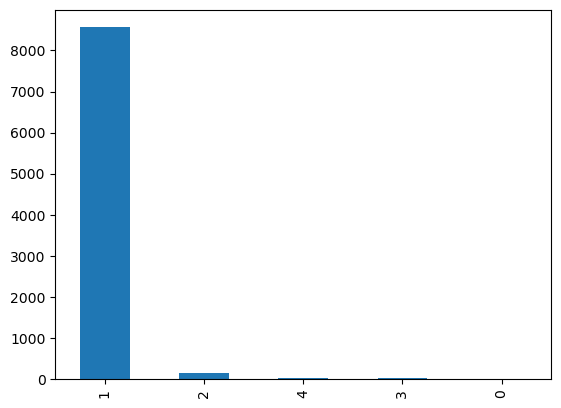

In [42]:
df_clust["cluster"].value_counts().plot.bar()